
<h1><center> <font color='black'>  Network Science (LTAT.02.011) - Practice Session - 03  </font></center></h1>
<h2><center> <font color='black'> Introduction to Network Analysis</font></center></h3>
<h2><center> <font color='black'> University of Tartu - Spring 2021</font></center></h3>


================================================================================================================

# Already Covered:
1. **Get familiar with the graphs and how to work with them;**
2. **Analyse the data about media companies. Figure out their connections;**
3. **Learn about various way of displaying statistic on the graphs**

# Today's session agenda:
+ **Specific graphs and graph models**
  1. Empty graph
  2. Complete graph/ Full graph
  3. Simple star graph
  4. Random tree
  5. Balanced tree
  6. Erdos-Renyi random graph model
  7. Watts–Strogatz small-world graph
  8. Barabási–Albert preferential attachment model
  9. Scale-free graph Vs Small-world graph
+ **Network and node descriptives**
  1. Density
  2. Reciprocity
  3. Transitivity
  4. Clustering coefficient
  5. Diameter
  6. Node degrees
  7. Degree distribution
  8. Paths
  9. Average path length
  10. Connected components
  11. Giant component
  12. k-cores
+ **Summary**

# Libraries needed:

**We need following libraries: networkx**


In [3]:
# Installing and importing networkx library
#!pip install networkx
import networkx as nx
import matplotlib.pyplot as plt

The above statement import the 'igraph' library in the current namespace, but rather than using the name networkx, we will refer it as 'nx'.

In [2]:
#Check its version
print(nx.__version__)

2.5


# 1. Specific graphs and graph models

## 1.1. Empty graph

In [5]:
n = 10
G = nx.empty_graph(n)

The above statement created an empty graph with n vertices and no edges and assigned it to the variable G. We called networkx inbuild function empty_graph() to build graph G. To confirm that it’s really a networkx graph, we can print it:

In [9]:
G

This tells us that G is an instance of networkx's Graph class and that it is currently living at the memory address 0x1e46e216040 (the exact output will almost surely be different for your platform). We can plot it to visualize the graph.

To obtain a more user-friendly output, we can try to print the graph using Python’s print statement:

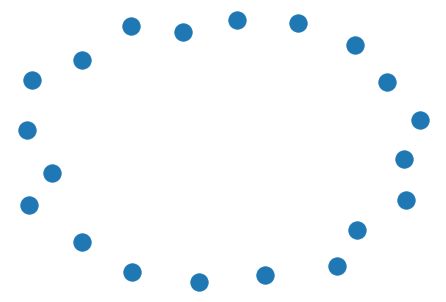

In [11]:
#plot
nx.draw(G)

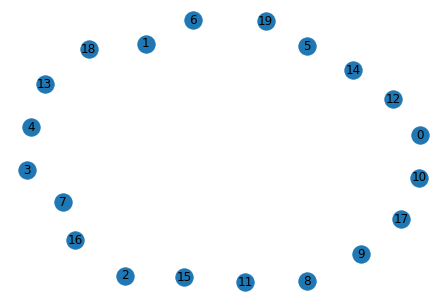

In [13]:
# Lets add vetices labels
nx.draw(G, with_labels=True)

## 1.2. Complete graph/ Full graph

1. Undirected complete graph: In graph theory, a complete graph is a simple undirected graph in which every pair of distinct vertices is connected by a unique edge.

2. Directed complete graph: A complete digraph is a directed graph in which every pair of distinct vertices is connected by a pair of unique edges (one in each direction).

In [14]:
K_5 = nx.complete_graph(5)

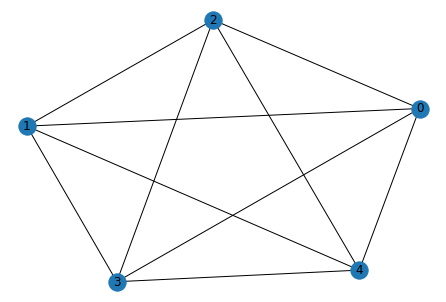

In [16]:
nx.draw(K_5, with_labels=True)

In [19]:
K_5_D = nx.DiGraph(K_5)

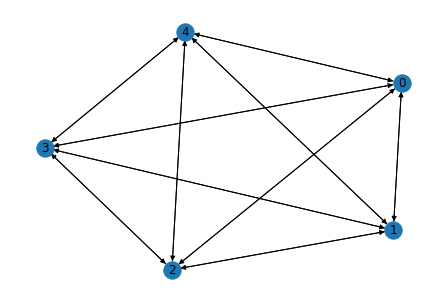

In [20]:
nx.draw(K_5_D, with_labels=True)

## 1.3. Simple star graph

In graph theory, a star Sₖ is the complete bipartite graph K1, ₖ: a tree with one internal node and k leaves. Alternatively, some authors define Sₖ to be the tree of order k with maximum diameter 2; in which case a star of k > 2 has k − 1 leaves.

In [21]:
st = nx.star_graph(20)

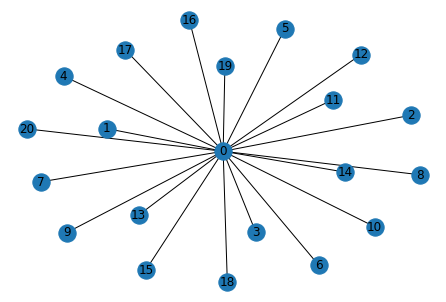

In [22]:
nx.draw(st, with_labels=True)

## 1.4. Random tree

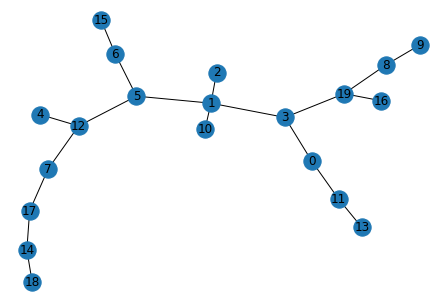

In [28]:
rt = nx.random_tree(20)
nx.draw(rt, with_labels=True)

## 1.5. Balanced tree

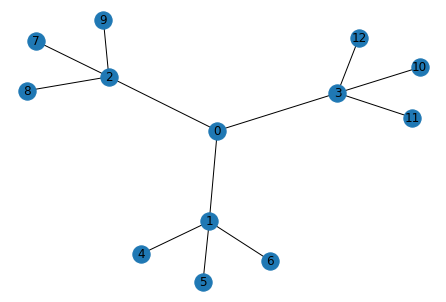

In [30]:
bt = nx.balanced_tree(3,2)
nx.draw(bt, with_labels=True)

## 1.6. Erdos-Renyi random graph model

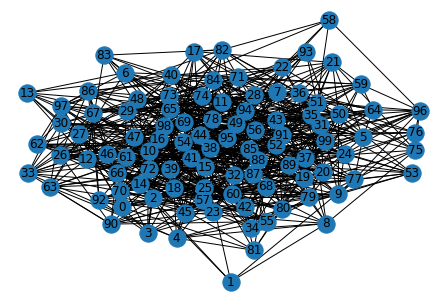

In [31]:
er = nx.erdos_renyi_graph(100, 0.15) #100 nodes connected with probability 0.15
nx.draw(er, with_labels=True)

(array([ 2.,  2.,  5., 13., 27., 21., 17.,  8.,  3.,  2.]),
 array([ 5.,  7.,  9., 11., 13., 15., 17., 19., 21., 23., 25.]),
 <BarContainer object of 10 artists>)

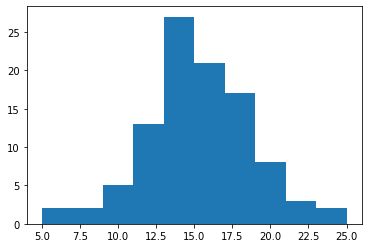

In [35]:
#Degree plot
degrees = [er.degree(n) for n in er.nodes()]
plt.hist(degrees)

## 1.7. Watts–Strogatz small-world graph

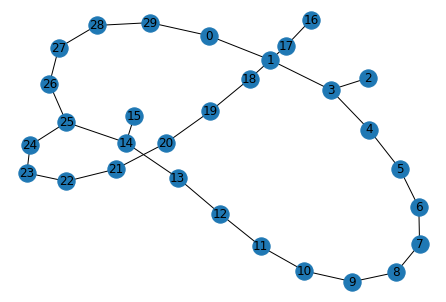

In [42]:
ws = nx.watts_strogatz_graph(30, 3, 0.1)
nx.draw(ws, with_labels=True)

(array([ 3.,  0.,  0.,  0.,  0., 24.,  0.,  0.,  0.,  3.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <BarContainer object of 10 artists>)

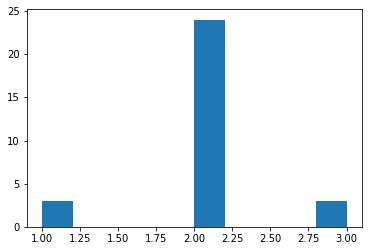

In [43]:
#Degree plot
degrees = [ws.degree(n) for n in ws.nodes()]
plt.hist(degrees)

## 1.8. Barabási–Albert preferential attachment model

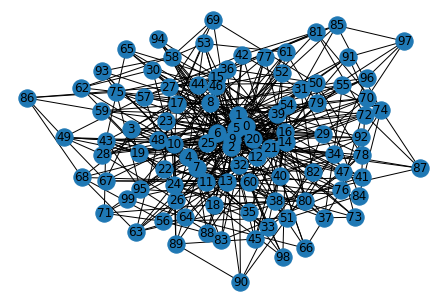

In [44]:
ba = nx.barabasi_albert_graph(100, 5)
nx.draw(ba, with_labels=True)

(array([61., 18.,  7.,  5.,  4.,  1.,  0.,  3.,  0.,  1.]),
 array([ 5. ,  8.2, 11.4, 14.6, 17.8, 21. , 24.2, 27.4, 30.6, 33.8, 37. ]),
 <BarContainer object of 10 artists>)

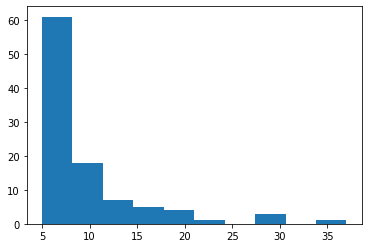

In [45]:
#Degree plot
degrees = [ba.degree(n) for n in ba.nodes()]
plt.hist(degrees)

## Exercise 1: Please plot the power-law distribution for Barabási–Albert preferential attachment model as shown in below Figure.

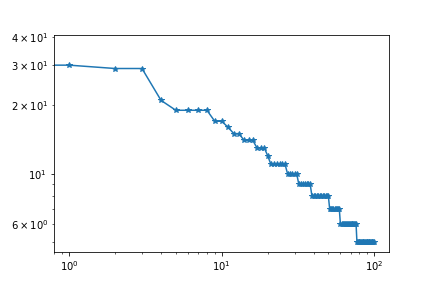

In [60]:
from IPython.display import Image
#Image("powerlaw.png")

In [ ]:
#power-law
degree_sequence = #TODO
plt.loglog(degree_sequence,marker='*')
plt.show()

## 1.9. Scale-free graph Vs Small-world graph

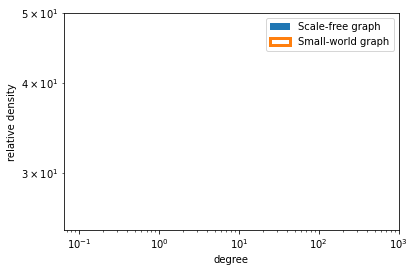

In [111]:
#https://stackoverflow.com/questions/49498344/using-python-and-networkx-to-find-the-probability-density-function
g1 = nx.scale_free_graph(1000, ) #scale-free graph
g2 = nx.watts_strogatz_graph(1000, 6, p=0.8) #small world graph

# we don't need to sort the values since the histogram will handle it for us
deg_g1 = [g1.degree(n) for n in g1.nodes()]
deg_g2 = [g2.degree(n) for n in g2.nodes()]
# there are smarter ways to choose bin locations, but since
# degrees must be discrete, we can be lazy...
max_degree = max(deg_g1 + deg_g2)

# plot different styles to see both
fig = plt.figure()
ax = fig.add_subplot(111)
arr1 = ax.hist(deg_g1, bins=range(0, max_degree), density=True, histtype='bar', rwidth=0.8, label='Scale-free graph')
arr2 = ax.hist(deg_g2, bins=range(0, max_degree), density=True, histtype='step', lw=3, label='Small-world graph') 

# setup the axes to be log/log scaled
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('degree')
ax.set_ylabel('relative density')
ax.legend()

plt.show()

Here we can see that g1 has an approximately straight line decay in the degree distribution -- as expected for scale-free distributions on log-log axes. Conversely, g2 does not have a scale-free degree distribution.

https://networkx.org/documentation/stable/reference/generators.html

# 2. Network and node descriptives

## 2.1. Density

The proportion of present edges from all possible edges in the network. In particular, for undirected simple graphs, the graph density is defined as D=2|E||V|(|V|−1). While for directed simple graphs, the graph density is defined as D=|E||V|(|V|−1), where |E| is the number of edges and |V| is the number of vertices in the graph. Note that the maximum number of edges is |V|(|V|−1)2.

In [62]:
nx.classes.function.density(ba)

0.09595959595959595

## 2.2 Reciprocity

In [63]:
ba_D = nx.DiGraph(ba)

In [65]:
nx.reciprocity(ba_D)

1.0

In [68]:
nx.triadic_census(ba_D)

{'003': 120653,
 '012': 0,
 '102': 35840,
 '021D': 0,
 '021U': 0,
 '021C': 0,
 '111D': 0,
 '111U': 0,
 '030T': 0,
 '030C': 0,
 '201': 4911,
 '120D': 0,
 '120U': 0,
 '120C': 0,
 '210': 0,
 '300': 296}

## 2.3. Transitivity

T=3#triangles#triads.

In [69]:
nx.transitivity(ba)

0.15312984997413348

In [70]:
nx.triangles(ba) #Compute the number of triangles.

{0: 30,
 1: 46,
 2: 14,
 3: 10,
 4: 21,
 5: 74,
 6: 63,
 7: 33,
 8: 32,
 9: 69,
 10: 28,
 11: 15,
 12: 16,
 13: 16,
 14: 19,
 15: 19,
 16: 20,
 17: 12,
 18: 10,
 19: 10,
 20: 14,
 21: 19,
 22: 9,
 23: 8,
 24: 13,
 25: 4,
 26: 10,
 27: 6,
 28: 5,
 29: 9,
 30: 5,
 31: 5,
 32: 8,
 33: 6,
 34: 5,
 35: 7,
 36: 4,
 37: 6,
 38: 5,
 39: 9,
 40: 6,
 41: 3,
 42: 5,
 43: 2,
 44: 4,
 45: 3,
 46: 6,
 47: 6,
 48: 4,
 49: 0,
 50: 5,
 51: 3,
 52: 4,
 53: 4,
 54: 4,
 55: 3,
 56: 6,
 57: 1,
 58: 3,
 59: 5,
 60: 2,
 61: 4,
 62: 2,
 63: 3,
 64: 2,
 65: 2,
 66: 2,
 67: 2,
 68: 2,
 69: 1,
 70: 8,
 71: 3,
 72: 4,
 73: 5,
 74: 3,
 75: 3,
 76: 1,
 77: 6,
 78: 1,
 79: 2,
 80: 0,
 81: 0,
 82: 3,
 83: 2,
 84: 1,
 85: 1,
 86: 0,
 87: 3,
 88: 2,
 89: 3,
 90: 1,
 91: 7,
 92: 2,
 93: 2,
 94: 5,
 95: 1,
 96: 3,
 97: 1,
 98: 0,
 99: 2}

## 2.4. Clustering coefficient

In [90]:
import statistics
statistics.mean(nx.clustering(ba).values()) #Compute the clustering coefficient for nodes.

0.181182905562723

In [78]:
nx.average_clustering(ba) #Compute the average clustering coefficient for the graph G.

0.18118290556272293

## 2.5. Diameter

In [91]:
nx.diameter(ba)

4

## 2.6. Node degrees

In [95]:
degrees = [ba.degree(n) for n in ba.nodes()]

In [108]:
degree_sequence = sorted([d for n, d in ba.degree()], reverse=True)

## 2.7. Degree distribution

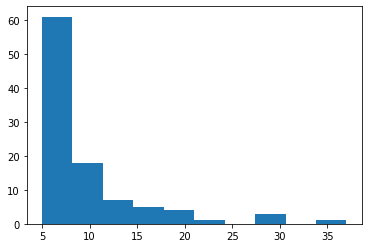

In [112]:
plt.hist(degrees)
plt.show()

## 2.8. Paths

In [118]:
G = nx.complete_graph(4)
all_simple_paths=nx.all_simple_paths(G, source=1, target=3) #Generate all simple paths in the graph G from source to target.
print(list(all_simple_paths))

[[1, 0, 2, 3], [1, 0, 3], [1, 2, 0, 3], [1, 2, 3], [1, 3]]


In [119]:
all_simple_edge_paths=nx.all_simple_edge_paths(G, source=1, target=3) #Generate lists of edges for all simple paths in G from source to target.
print(list(all_simple_edge_paths))

[[(1, 0), (0, 2), (2, 3)], [(1, 0), (0, 3)], [(1, 2), (2, 0), (0, 3)], [(1, 2), (2, 3)], [(1, 3)]]


In [122]:
is_simple_path=nx.is_simple_path(G, (1,3)) #Returns True if and only if nodes form a simple path in G.
print(is_simple_path)

True


In [123]:
shortest_simple_paths=nx.shortest_simple_paths(G, source=1, target=3) #Generate all simple paths in the graph G from source to target,
print(list(shortest_simple_paths))

[[1, 3], [1, 0, 3], [1, 2, 3], [1, 0, 2, 3], [1, 2, 0, 3]]


## 2.9. Average path length

https://networkx.org/documentation/networkx-1.10/reference/algorithms.shortest_paths.html

In [124]:
nx.shortest_path(G, source=1, target=3) #Compute shortest paths in the graph.

[1, 3]

In [126]:
all_shortest_paths=nx.all_shortest_paths(G, source=1, target=3) #Compute all shortest paths in the graph.
print(list(all_shortest_paths))

[[1, 3]]


In [127]:
nx.shortest_path_length(G, source=1, target=3) #Compute shortest path lengths in the graph.

1

In [129]:
nx.average_shortest_path_length(G) #Return the average shortest path length.

1.0

In [130]:
nx.average_shortest_path_length(ba)

2.229090909090909

## 2.10. Connected components

In [131]:
nx.algorithms.components.number_connected_components(ba)

1

In [137]:
total_nodes = 1000
n=total_nodes
sequence = nx.random_powerlaw_tree_sequence(n, tries=1000000, seed=810)
G = nx.configuration_model(sequence, seed=158)
G=nx.Graph(G)
G.remove_edges_from(nx.selfloop_edges(G))

In [138]:
nx.algorithms.components.number_connected_components(G)

117

In [139]:
nx.write_gpickle(G, "test.gpickle")

In [143]:
G1 = nx.read_gpickle("test.gpickle")

In [ ]:
nx.is_isomorphic(G1, G) #Check whether two graphs are same
#Note: Not a good idea as it is time consuming. Better is to compare properties.

In [154]:
def net_prop_dict(G):
    prop_dict = {}

    prop_dict['no_of_nodes'] = nx.number_of_nodes(G)
    prop_dict['no_of_edges'] = nx.number_of_edges(G)
    if nx.is_connected(G):
        prop_dict['average_shortest_path_length'] = nx.average_shortest_path_length(G)
        prop_dict['diameter'] = nx.diameter(G)
    prop_dict['transitivity'] = nx.transitivity(G)
    prop_dict['average_clustering'] = nx.average_clustering(G)   
    prop_dict['edge_density'] = nx.classes.function.density(G)
    prop_dict['average_degree'] = np.array([d for n, d in G.degree()]).sum()/10000
    prop_dict['total_triangles'] = np.array(list(nx.triangles(G).values())).sum()
    prop_dict['number_connected_components'] = nx.algorithms.components.number_connected_components(G)
    return prop_dict

In [155]:
prop_dict_G = net_prop_dict(G)
prop_dict_G1 = net_prop_dict(G1)

In [157]:
prop_dict_G

{'no_of_nodes': 1000,
 'no_of_edges': 994,
 'transitivity': 0.0052925610114672155,
 'average_clustering': 0.0035348666379975678,
 'edge_density': 0.00198998998998999,
 'average_degree': 0.1988,
 'total_triangles': 18,
 'number_connected_components': 117}

In [156]:
prop_dict_G == prop_dict_G1

True

## 2.11. Giant component

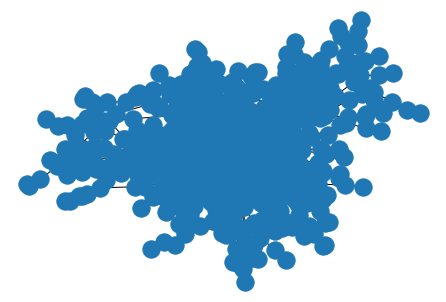

In [161]:
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G0 = G.subgraph(Gcc[0])
nx.draw(G0)

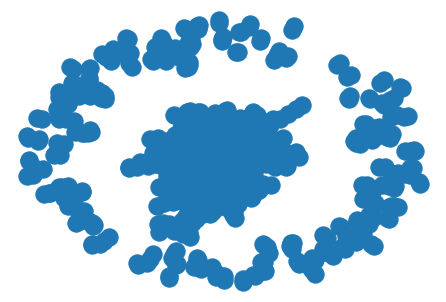

In [162]:
nx.draw(G)

In [163]:
net_prop_dict(G0)

{'no_of_nodes': 705,
 'no_of_edges': 815,
 'average_shortest_path_length': 7.045535138620245,
 'diameter': 19,
 'transitivity': 0.005403782647853498,
 'average_clustering': 0.005013995231202223,
 'edge_density': 0.0032841715022566085,
 'average_degree': 0.163,
 'total_triangles': 18,
 'number_connected_components': 1}

## 2.12. k-cores

In [177]:
k_core = nx.k_core(G, k=2)

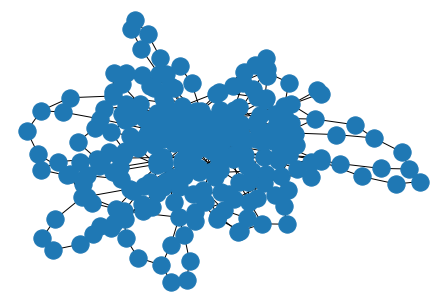

In [178]:
nx.draw(k_core)

In [179]:
net_prop_dict(k_core)

{'no_of_nodes': 258,
 'no_of_edges': 368,
 'average_shortest_path_length': 5.448074080777004,
 'diameter': 13,
 'transitivity': 0.014634146341463415,
 'average_clustering': 0.018294961865413302,
 'edge_density': 0.011100051277410792,
 'average_degree': 0.0736,
 'total_triangles': 18,
 'number_connected_components': 1}

# 3. Summay

In [ ]:
def net_prop_dict(G):
    prop_dict = {}

    prop_dict['no_of_nodes'] = nx.number_of_nodes(G)
    prop_dict['no_of_edges'] = nx.number_of_edges(G)
    if nx.is_connected(G):
        prop_dict['average_shortest_path_length'] = nx.average_shortest_path_length(G)
        prop_dict['diameter'] = nx.diameter(G)
    prop_dict['transitivity'] = nx.transitivity(G)
    prop_dict['average_clustering'] = nx.average_clustering(G)   
    prop_dict['edge_density'] = nx.classes.function.density(G)
    prop_dict['average_degree'] = np.array([d for n, d in G.degree()]).sum()/10000
    prop_dict['total_triangles'] = np.array(list(nx.triangles(G).values())).sum()
    prop_dict['number_connected_components'] = nx.algorithms.components.number_connected_components(G)
    return prop_dict

In [181]:
def net_prop_dict_whole(G, k):
    prop_dict = {}

    prop_dict['no_of_nodes'] = nx.number_of_nodes(G)
    prop_dict['no_of_edges'] = nx.number_of_edges(G)
    if nx.is_connected(G):
        prop_dict['average_shortest_path_length'] = nx.average_shortest_path_length(G)
        prop_dict['diameter'] = nx.diameter(G)
    prop_dict['transitivity'] = nx.transitivity(G)
    prop_dict['average_clustering'] = nx.average_clustering(G)   
    prop_dict['edge_density'] = nx.classes.function.density(G)
    prop_dict['average_degree'] = np.array([d for n, d in G.degree()]).sum()/10000
    prop_dict['total_triangles'] = np.array(list(nx.triangles(G).values())).sum()
    prop_dict['number_connected_components'] = nx.algorithms.components.number_connected_components(G)
    prop_dict['giant_component_prop'] = net_prop_dict(G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0]))
    prop_dict['k_core_prop'] = net_prop_dict(nx.k_core(G))
    return prop_dict

In [182]:
net_prop_dict_whole(G, 2)

{'no_of_nodes': 1000,
 'no_of_edges': 994,
 'transitivity': 0.0052925610114672155,
 'average_clustering': 0.0035348666379975678,
 'edge_density': 0.00198998998998999,
 'average_degree': 0.1988,
 'total_triangles': 18,
 'number_connected_components': 117,
 'giant_component_prop': {'no_of_nodes': 705,
  'no_of_edges': 815,
  'average_shortest_path_length': 7.045535138620245,
  'diameter': 19,
  'transitivity': 0.005403782647853498,
  'average_clustering': 0.005013995231202223,
  'edge_density': 0.0032841715022566085,
  'average_degree': 0.163,
  'total_triangles': 18,
  'number_connected_components': 1},
 'k_core_prop': {'no_of_nodes': 258,
  'no_of_edges': 368,
  'average_shortest_path_length': 5.448074080777004,
  'diameter': 13,
  'transitivity': 0.014634146341463415,
  'average_clustering': 0.018294961865413302,
  'edge_density': 0.011100051277410792,
  'average_degree': 0.0736,
  'total_triangles': 18,
  'number_connected_components': 1}}

## Exercise 2: 

## 2.1. Create networkx graph using nodes (InputFileNodes.csv) and edges (InputFileEdges.csv) datasets.

In [ ]:
import pandas as pd
nodes = pd.read_csv('InputFileNodes.csv')
edges = pd.read_csv('InputFileEdges.csv')

G = #TODO

## 2.1. Calculate various properties on the graph created in Exercise 2.1.

In [ ]:
#For example: net_prop_dict_whole(G, 2)
#Please try to calculate properties (1) considering weights and (2) without considering weights